# Titanic EDA

The particular algorithm is about predicting which passengers survived the sinking of Titatnic, and the dataset contains information on passengers abroad the titanic. So we will use the dataset to predict whether those people survived or not.  

And this type of algorithm is called **CLASSFICATION** algorithm or more specifically, **BINARY CLASSIFICATION**, where we are predicting two different states, whether the passenger is a survivor or not.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True, ignore_index=True)

df_train = pd.read_csv('C:/Data Science/My Datasets/titanic_train.csv')
df_test = pd.read_csv('C:/Data Science/My Datasets/titanic_test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

In [21]:
print(df_train.columns)
print(df_train.info())
print('Number of Training Examples = {}'.format(df_train.shape[0]))
df_train.tail()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Number of Training Examples = 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
print(df_test.columns)
print(df_test.info())
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
df_test.head()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
Number of Test Examples = 418



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
print(df_all.columns)
print(df_all.info())
print('Total number of Examples = {}\n'.format(df_all.shape[0]))
df_all.sample(9)

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
Total number of Examples = 1309



,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
790,NaN,NaN,Q,7.7500,"Keane, Mr. Andrew ""Andy""",0,791,3,male,0,0.0,12460
1028,26.00,NaN,S,13.0000,"Schmidt, Mr. August",0,1029,2,male,0,NaN,248659
305,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,306,1,male,1,1.0,113781
864,24.00,NaN,S,13.0000,"Gill, Mr. John William",0,865,2,male,0,0.0,233866
1270,5.00,NaN,S,31.3875,"Asplund, Master. Carl Edgar",2,1271,3,male,4,NaN,347077
1240,31.00,NaN,S,21.0000,"Walcroft, Miss. Nellie",0,1241,2,female,0,NaN,F.C.C. 13528
564,NaN,NaN,S,8.0500,"Meanwell, Miss. (Marion Ogden)",0,565,3,female,0,0.0,SOTON/O.Q. 392087
606,30.00,NaN,S,7.8958,"Karaic, Mr. Milan",0,607,3,male,0,0.0,349246
592,47.00,NaN,S,7.2500,"Elsbury, Mr. William James",0,593,3,male,0,0.0,A/5 3902


So to start off, we have to acquire some domain knowledge in terms of thinking about the data as to what variables might impact the outcome (survival or not), and is usually the most important determinant in machine learning. So for example, since women and children were given priority on the lifeboats, so gender and age along with the ticket class that passengers bought, may be good predictors of the survival. Looking at the data dictionary, which explains the various columns that make up the data set, below are the columns descriptions:

- Training set has 891 rows and test set has 418 rows
`PassengerId` is the unique id of the row and it doesn't have any effect on target

- `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
- `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**, **2** or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
- `Name`, `Sex` and `Age` are self-explanatory
- `SibSp` is the total number of the passengers' siblings and spouse
- `Parch` is the total number of the passengers' parents and children
- `Ticket` is the ticket number of the passenger
- `Fare` is the passenger fare
- `Cabin` is the cabin number of the passenger
- `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [6]:
for each_col in df_train.columns:
    print ('{0} column missing values: {1}, so {2}% of values are missing'.format(each_col, df_all[each_col].isnull().sum(),(1 - (df_all[each_col].count() / len(df_all[each_col]))).round(1) * 100))

PassengerId column missing values: 0, so 0.0% of values are missing
Survived column missing values: 418, so 30.0% of values are missing
Pclass column missing values: 0, so 0.0% of values are missing
Name column missing values: 0, so 0.0% of values are missing
Sex column missing values: 0, so 0.0% of values are missing
Age column missing values: 263, so 20.0% of values are missing
SibSp column missing values: 0, so 0.0% of values are missing
Parch column missing values: 0, so 0.0% of values are missing
Ticket column missing values: 0, so 0.0% of values are missing
Fare column missing values: 1, so 0.0% of values are missing
Cabin column missing values: 1014, so 80.0% of values are missing
Embarked column missing values: 2, so 0.0% of values are missing


Once we have some information on the dataset, we then proceed to clean and organize the dataset, and the biggest cleaning task is, addressing the missing values, which could be due to; 

- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples. The count of missing values in Age, Embarked and Fare are smaller compared to total sample, but roughly 80% of the Cabin is missing. Missing values in Age, Embarked and Fare can be filled with descriptive statistical measures but that wouldn't work for Cabin.

                  Age      Fare     Parch  PassengerId    Pclass     SibSp  \
Age          1.000000  0.178740 -0.150917     0.028814 -0.408106 -0.243699   
Fare         0.178740  1.000000  0.221539     0.031428 -0.558629  0.160238   
Parch       -0.150917  0.221539  1.000000     0.008942  0.018322  0.373587   
PassengerId  0.028814  0.031428  0.008942     1.000000 -0.038354 -0.055224   
Pclass      -0.408106 -0.558629  0.018322    -0.038354  1.000000  0.060832   
SibSp       -0.243699  0.160238  0.373587    -0.055224  0.060832  1.000000   
Survived    -0.077221  0.257307  0.081629    -0.005007 -0.338481 -0.035322   

             Survived  
Age         -0.077221  
Fare         0.257307  
Parch        0.081629  
PassengerId -0.005007  
Pclass      -0.338481  
SibSp       -0.035322  
Survived     1.000000  


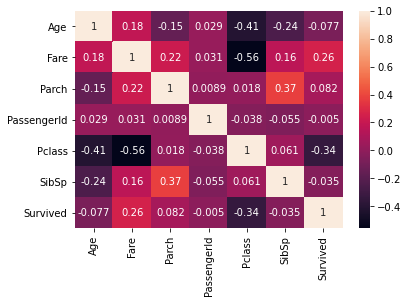

In [7]:
import seaborn as sns
corrMatrix = df_corr()all.
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Embarked is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. When I googled **Stone, Mrs. George Nelson (Martha Evelyn)**, I found that she embarked from **S (Southampton)** with her maid **Amelie Icard**, in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

> Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

Missing values in `Embarked` are filled with **S** with this information.

In [8]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

There is only one passenger with missing Fare value. We can assume that Fare is related to family size (Parch and SibSp) and Pclass features. Median Fare value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [9]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

Cabin feature is little bit tricky and it needs further exploration. The large portion of the Cabin feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. It turns out to be the first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/532e800b-e23f-43da-a471-0610501af98c/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/532e800b-e23f-43da-a471-0610501af98c/Untitled.png)

- On the Boat Deck there were **6** rooms labeled as **T, U, W, X, Y, Z** but only the **T** cabin is present in the dataset
- **A**, **B** and **C** decks were only for 1st class passengers
- **D** and **E** decks were for all classes
- **F** and **G** decks were for both 2nd and 3rd class passengers
- From going **A** to **G**, distance to the staircase increases which might be a factor of survival

Further,

- **100%** of **A**, **B** and **C** decks are 1st class passengers
- Deck **D** has **87%** 1st class and **13%** 2nd class passengers
- Deck **E** has **83%** 1st class, **10%** 2nd class and **7%** 3rd class passengers
- Deck **F** has **62%** 2nd class and **38%** 3rd class passengers
- **100%** of **G** deck are 3rd class passengers
- There is one person on the boat deck in **T** cabin and he is a 1st class passenger. **T** cabin passenger has the closest resemblance to **A** deck passengers so he is grouped with **A** deck
- Passengers labeled as **M** are the missing values in `Cabin` feature. I don't think it is possible to find those passengers' real `Deck` so I decided to use **M** like a deck

In [10]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')


df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

In [11]:
deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
decks = df_all_decks.columns.levels[0]
decks

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='Deck')

In [12]:
df_all_decks['A'][1][0]

22

In [13]:
for deck in decks:
    for pclass in range(1, 4):
        try:
            deck_counts[deck][pclass] = df_all_decks[deck][pclass][0]
        except KeyError:
            deck_counts[deck][pclass] = 0

In [14]:
deck_counts

{'A': {1: 22, 2: 0, 3: 0},
 'B': {1: 65, 2: 0, 3: 0},
 'C': {1: 94, 2: 0, 3: 0},
 'D': {1: 40, 2: 6, 3: 0},
 'E': {1: 34, 2: 4, 3: 3},
 'F': {1: 0, 2: 13, 3: 8},
 'G': {1: 0, 2: 0, 3: 5},
 'M': {1: 67, 2: 254, 3: 693},
 'T': {1: 1, 2: 0, 3: 0}}

In [15]:
df_decks = pd.DataFrame(deck_counts)
df_decks

,A,B,C,D,E,F,G,M,T
1,22,65,94,40,34,0,0,67,1
2,0,0,0,6,4,13,0,254,0
3,0,0,0,0,3,8,5,693,0


In [24]:
# Creating a dictionary for every passenger class percentage in every deck
deck_percentages = {}
for col in df_decks.columns:
    percent_dict = {}
    n = 1
    for passanger_count_value in df_decks[col]:
        percent_dict[n] = (passanger_count_value / df_decks[col].sum()).round(1) * 100
        n += 1
    deck_percentages[col] = percent_dict

deck_percentages    

{'A': {1: 100.0, 2: 0.0, 3: 0.0},
 'B': {1: 100.0, 2: 0.0, 3: 0.0},
 'C': {1: 100.0, 2: 0.0, 3: 0.0},
 'D': {1: 90.0, 2: 10.0, 3: 0.0},
 'E': {1: 80.0, 2: 10.0, 3: 10.0},
 'F': {1: 0.0, 2: 60.0, 3: 40.0},
 'G': {1: 0.0, 2: 0.0, 3: 100.0},
 'M': {1: 10.0, 2: 30.0, 3: 70.0},
 'T': {1: 100.0, 2: 0.0, 3: 0.0}}

In [25]:
df_deck_percentages = pd.DataFrame(deck_percentages)
df_deck_percentages

,A,B,C,D,E,F,G,M,T
1,100.0,100.0,100.0,90.0,80.0,0.0,0.0,10.0,100.0
2,0.0,0.0,0.0,10.0,10.0,60.0,0.0,30.0,0.0
3,0.0,0.0,0.0,0.0,10.0,40.0,100.0,70.0,0.0


As see, every deck has different survival rates and that information can't be discarded. Deck **B**, **C**, **D** and **E** have the highest survival rates. Those decks are mostly occupied by 1st class passengers. **M** has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers. To conclude, cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers. In my opinion **M** (Missing `Cabin` values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims. That's why I believe labeling that group as **M** is a reasonable way to handle the missing data. It is a unique group with shared characteristics. Hence

- **A**, **B** and **C** decks are labeled as **ABC** because all of them have only 1st class passengers
- **D** and **E** decks are labeled as **DE** because both of them have similar passenger class distribution and same survival rate
- **F** and **G** decks are labeled as **FG** because of the same reason above
- **M** deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [18]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [162]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()
surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
decks = df_all_decks_survived.columns.levels[0]    
for deck in decks:
    for survive in range(0, 2):
            surv_counts[deck][survive] = df_all_decks_survived[deck][survive][0]
df_surv = pd.DataFrame(surv_counts)
df_surv

,A,B,C,D,E,F,G,M
0,9,12,24,8,8,5,2,481
1,7,35,35,25,24,8,2,206


In [163]:
surv_percentages = {}
for col in df_surv.columns:
    percent_dict = {}
    n = 0
    for passanger_count_value in df_surv[col]:
        percent_dict[n] = (passanger_count_value / df_surv[col].sum()).round(1) * 100
        n += 1
    surv_percentages[col] = percent_dict
df_surv_percentages = pd.DataFrame(surv_percentages)        
df_surv_percentages        

,A,B,C,D,E,F,G,M
0,60.0,30.0,40.0,20.0,20.0,40.0,50.0,70.0
1,40.0,70.0,60.0,80.0,80.0,60.0,50.0,30.0


In [164]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [165]:
# Dropping the Cabin feature
df_all.drop(['Cabin'], inplace=True, axis=1)

Missing values in Age are filled with median age, but using median age of the whole data set is not a good choice. Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106) and Survived (0.338481). In order to be more accurate, Sex feature is used as the second level of groupby while filling the missing Age values. As seen from below, Pclass and Sex groups have distinct median Age values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median Age than males. The median ages below are used for filling the missing values in Age feature.

In [93]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [26]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train, df_test = divide_df(df_all)

df_train.name = 'Training Set'
df_test.name = 'Test Set'

dfs = [df_train, df_test]

def display_missing(df):
    print (df.name)
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    display_missing(df)
    

Training Set
Age column missing values: 177
Cabin column missing values: 687
Embarked column missing values: 2
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0


Test Set
Age column missing values: 86
Cabin column missing values: 327
Embarked column missing values: 0
Fare column missing values: 1
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0




## Target Distribution
38.38% (342/891) of training set is Class 1
61.62% (549/891) of training set is Class 0

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


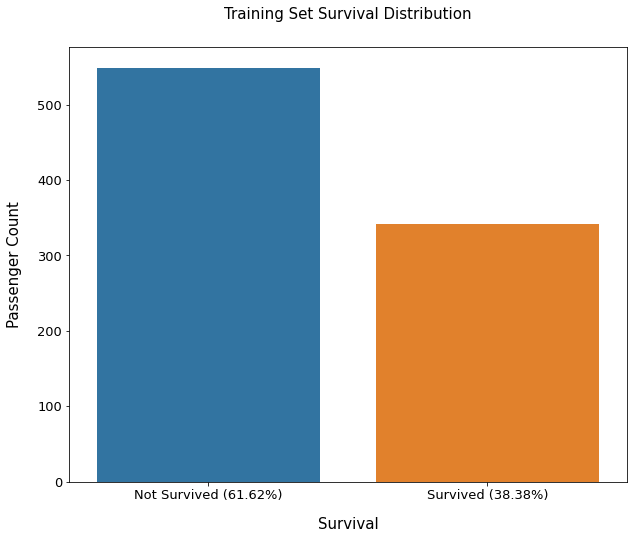

In [173]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(df_train['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

### **Correlations**

Features are highly correlated with each other and dependent to each other. The highest correlation between features is **0.549500** in training set and **0.577147** in test set (between `Fare` and `Pclass`). The other features are also highly correlated. There are **9** correlations in training set and **6** correlations in test set that are higher than **0.1**.

In [185]:
df_train_corr = df_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)
df_train_corr_nd

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.549500
7,Fare,Pclass,0.549500
8,Pclass,Age,0.417667
9,Age,Pclass,0.417667
10,SibSp,Parch,0.414838
11,Parch,SibSp,0.414838
12,Survived,Pclass,0.338481
13,Pclass,Survived,0.338481
14,Survived,Fare,0.257307
15,Fare,Survived,0.257307


In [186]:
# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.549500
7,Fare,Pclass,0.549500
8,Pclass,Age,0.417667
9,Age,Pclass,0.417667
10,SibSp,Parch,0.414838
11,Parch,SibSp,0.414838
12,Survived,Pclass,0.338481
13,Pclass,Survived,0.338481
14,Survived,Fare,0.257307
15,Fare,Survived,0.257307


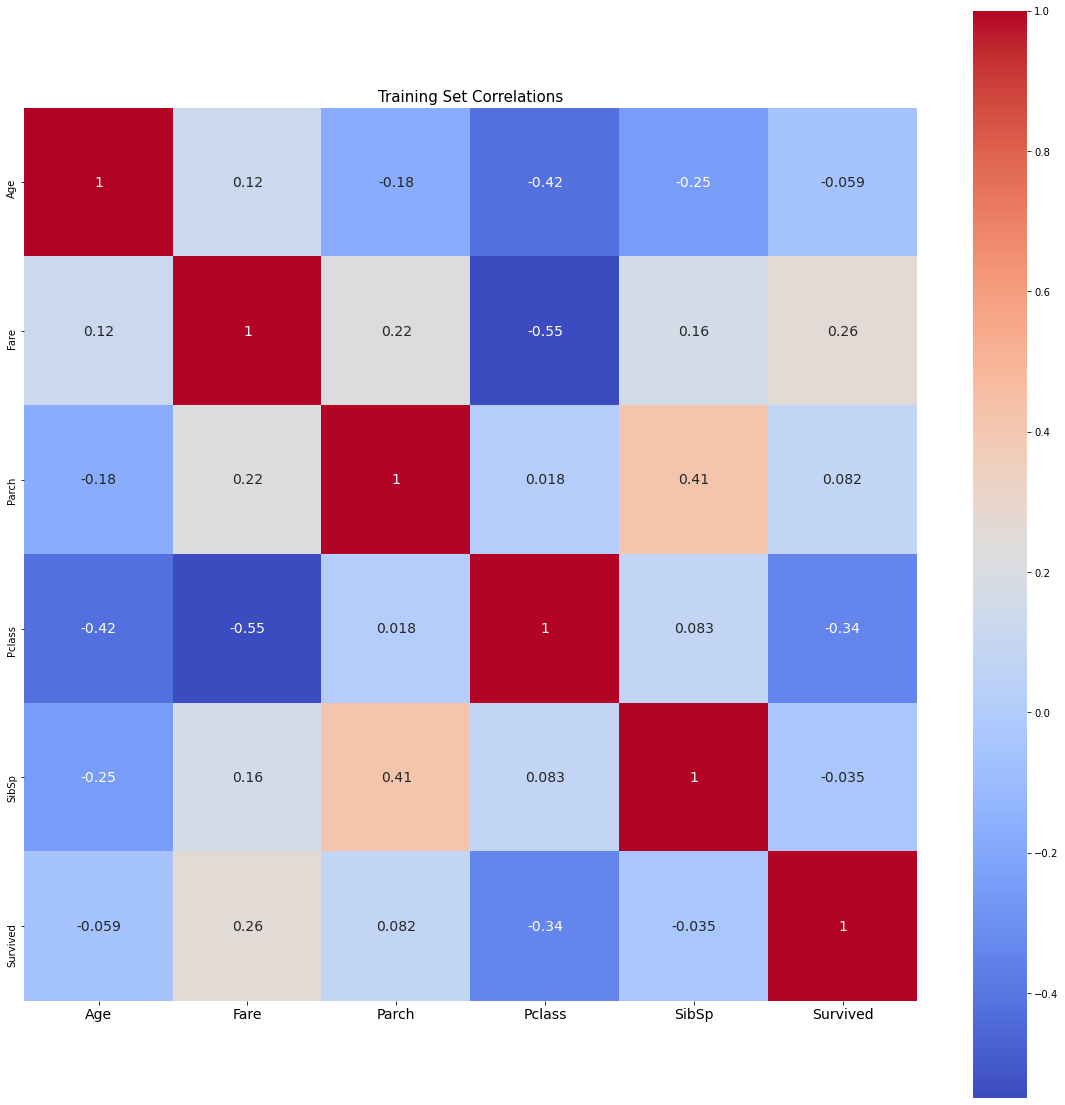

In [191]:
fig, axs = plt.subplots(nrows=1, figsize=(20, 20))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

axs.tick_params(axis='x', labelsize=14)
axs.set_title('Training Set Correlations', size=15)

plt.show()

In [192]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### **Conclusion**

Most of the features are correlated with each other. This relationship can be used to create new features with feature transformation and feature interaction. Target encoding could be very useful as well because of the high correlations with `Survived` feature.

Categorical features have very distinct distributions with different survival rates. Those features can be one-hot encoded. Some of those features may be combined with each other to make new features.

## **Feature Engineering**

**Binning Continuous Features**

### **Fare**

`Fare` feature is positively skewed and survival rate is extremely high on the right end. **13** quantile based bins are used for `Fare` feature. Even though the bins are too much, they provide decent amount of information gain. The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate. This high survival rate was not visible in the distribution graph.

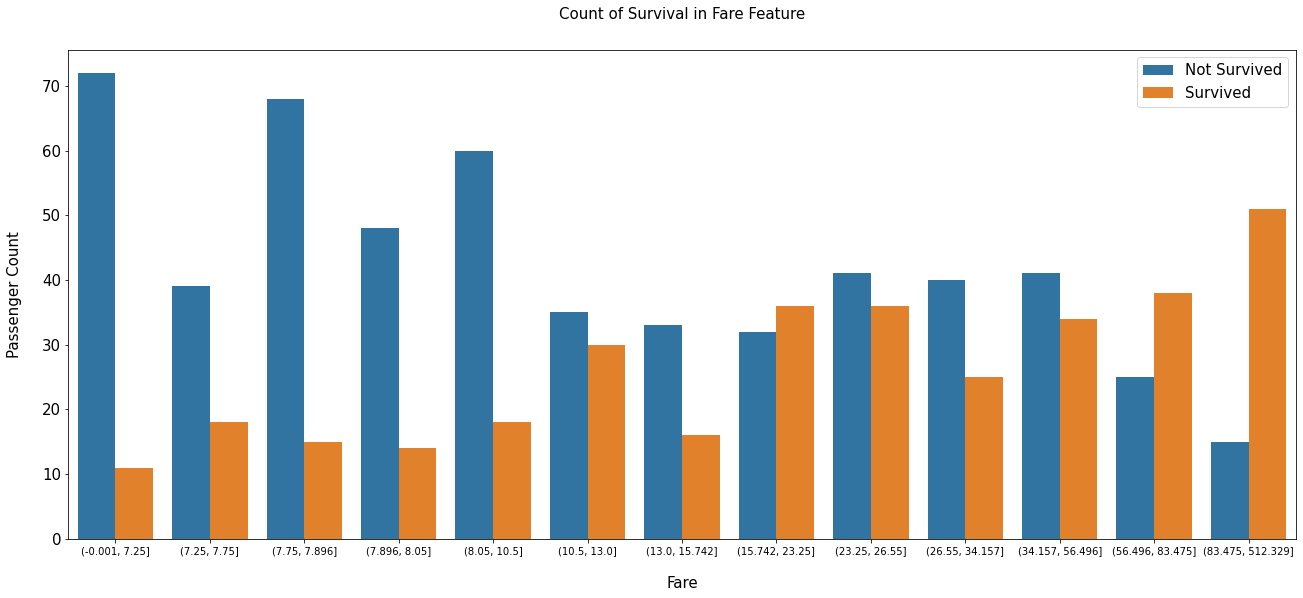

In [27]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

**Age**

`Age` feature has a normal distribution with some spikes and bumps and **10** quantile based bins are used for `Age`. The first bin has the highest survival rate and 4th bin has the lowest survival rate. Those were the biggest spikes in the distribution.

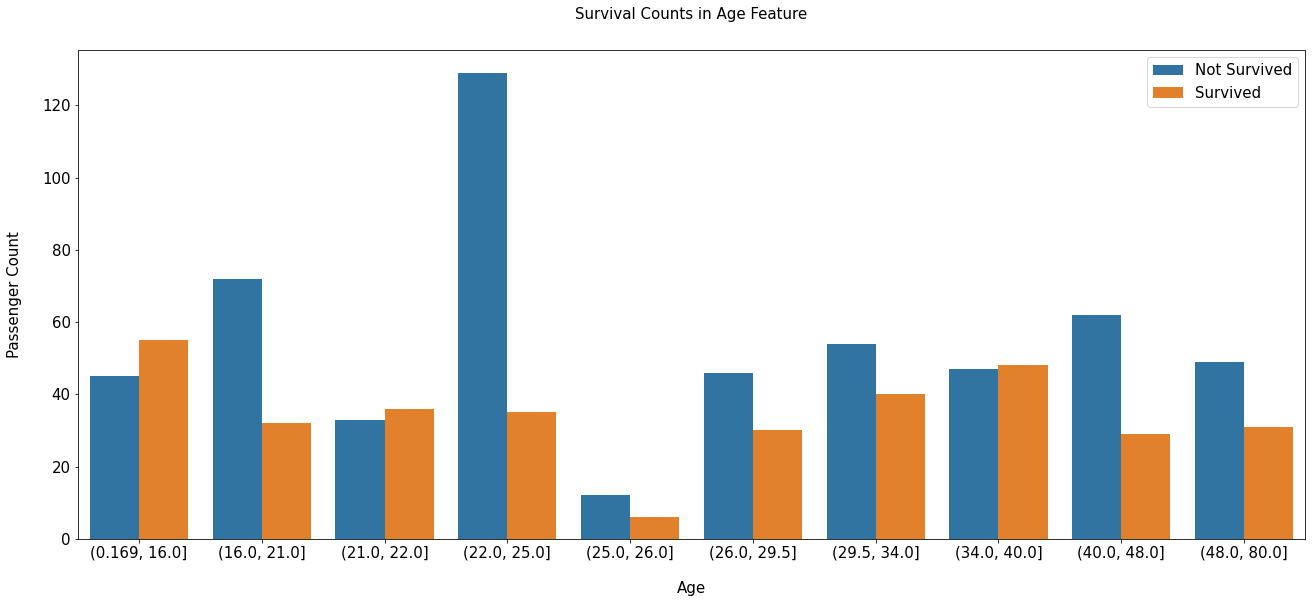

In [194]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()